The Titanic Data set entails information on the passengers of the famous RMS Titanic ship that tragically sank on April 14, 1912. I used this dataset to evaluate and answer the following several questions about the passengers
1.	How did a passengers class affect their survival rate? Did 1st class passengers survive at a higher rate than 3rd class passengers? 
2.	How did the sex of passengers affect survival rate?
3.	How did ticket Fare’s compare within and between passenger classes?
4.	Did people with more family members on board survive at a higher rate or did single people?
5.	How did age affect survival rates? What was the average age of a survivor and a lost soul? 
6.	Was the embarking location correlated to passenger class?
7.	Where did the majority of passengers embark from?
8.	How did the embarking location affect survival rates?

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
initial_data = pd.read_csv("../data/titanic.csv")

initial_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
initial_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [13]:
initial_data.shape

(891, 12)

The data set contrives of a table of 12 columns and 891 rows to represent 891 documented passengers aboard the titanic out of the  roughly 1,500 passengers and crew that were aboard the ship. Because this dataset does not include information on every soul on the ship, the following data analysis may be inacurate towards the true numbers from the event. Despite the incomplete data, I will still attempt to learn about the event and draw conclusions about the event with the available data.

First the data must be cleaned. First, the columns Ticket, and Cabin will not be evaluated so it will be removed from the data set to simplify it. 

In [20]:
data = initial_data.iloc[:,[0,1,2,4,5,6,7,9,11]]
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Next, We will check for any null values contained within the data set so that they can be removed.

In [21]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

Since the null values are restricted to the age and embarked columns, I will include for the first queries, but prune them from the data before analyzing those ones. Next I will check for duplicate entries.

In [22]:
data.duplicated().sum()

np.int64(0)

Since there are 0 duplicates, it is time to begin analyzing the data.

Question 1: 
How did a passengers class affect their survival rate? Did 1st class passengers survive at a higher rate than 3rd class passengers?



In [35]:
class_survival_total = data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).sum()
class_survival_total

,Pclass,Survived
0,1,136
1,2,87
2,3,119


In [34]:
class_survival_rates = data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
class_survival_rates


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


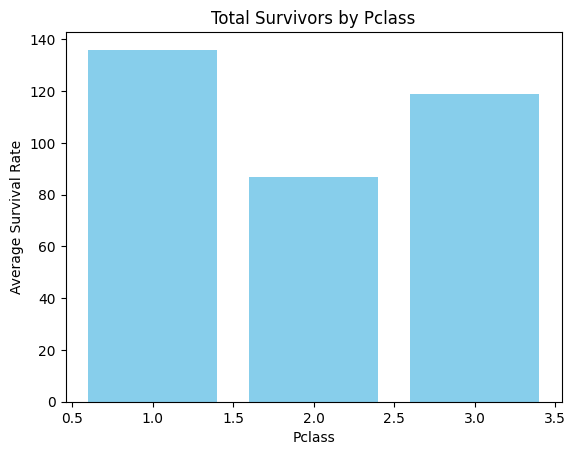

In [47]:
plt.bar(class_survival_total['Pclass'], class_survival_total['Survived'], color='skyblue')

plt.xlabel('Pclass')
plt.ylabel('Average Survival Rate')
plt.title('Total Survivors by Pclass')

plt.show()

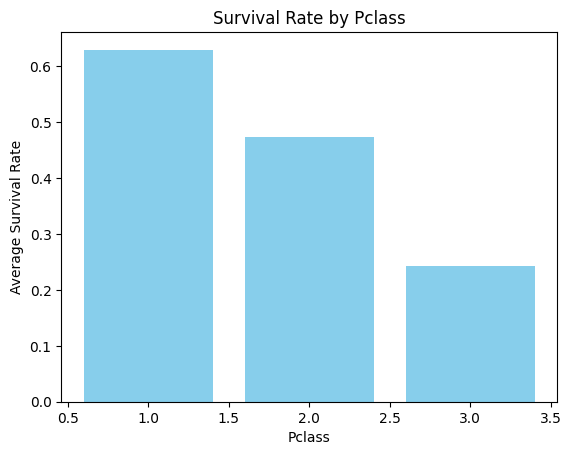

In [40]:
plt.bar(class_survival_rates['Pclass'], class_survival_rates['Survived'], color='skyblue')

plt.xlabel('Pclass')
plt.ylabel('Average Survival Rate')
plt.title('Survival Rate by Pclass')

plt.show()

These graphs demonstrate that the highest number of 1st class passengers survived closely followed by passengers of 3rd class and 2nd class had the fewest survivors. Yet this difference is highly afffected by the fact that the classes did not contain an equal number of passengers. If you look at the rate of survival, it is clear that 1st class was prioritized with a over 60% survival rate compared to a 47% survival rate of 2nd class passenegers and an only 24% survival rate of 3rd class passengers.

Question 2: 
How did the sex of passengers affect survival rate?